# **Avaliar e comparar as caracteristicas de grafos usando a biblioteca owlready2**

### Autor: Laura M. Parra
Data inicio: 11/01/2024

Data atualização: 17/01/2024

A avaliação de características em uma ontologia OWL pode envolver verificação de consistência, inferência de instâncias, extração de informações e consultas SPARQL. No Python, pode-ser utilizada a biblioteca owlready2 para trabalhar com ontologias OWL.

Foi incluida a comparação entre duas ontologias, analisando as classes em comum.

Consultar a documentação do owlready2 para obter mais informações: https://owlready2.readthedocs.io/

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

!pip install owlready2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 36.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.45-cp310-cp310-linux_x86_64.whl size=24077431 sha256=f129dcf807a6070ca978c9eae114cb1eb53e694332a6e793e7eca3562cf933f9
  Stored in directory: /root/.cache/pip/wheels/5c/f4/9d/249b1671d391e3feddd443c7d0eb79a732afabc9f370591271
Successfully built owlready2


In [4]:
!pip install graphviz

In [10]:
# Importar a biblioteca owlready2
from owlready2 import *
from graphviz import Digraph

# Caminho do arquivo OWL
path_to_owl_file = "/content/drive/MyDrive/Datasets/PetroKGraphOntology.owl"
path_to_owl_file2 = "/content/drive/MyDrive/Datasets/OntoGeoLogicaEntidadesNomeadas.owl"

# Carregue a ontologia
onto = get_ontology("file://" + path_to_owl_file).load()
onto2 = get_ontology("file://" + path_to_owl_file2).load()

Removemos a chamada sync_reasoner() antes da consulta SPARQL, pois a execução do raciocínio pode não ser necessária para operações de consulta SPARQL simples.


Usamos a função onto.classes() para obter todas as classes na ontologia e, em seguida, itera sobre elas para exibir os resultados. Este método deve funcionar sem o uso da consulta SPARQL.

In [16]:
# Consulta SPARQL para obter todas as classes na ontologia
classes = list(onto.classes())
# Variavel para contar as classes na ontologia
contador_classes = 0

# Exibir todas as classes encontradas
print("Classes na ontologia:")
for classe in classes:
    print(classe)
    contador_classes += 1

# Imprimir a contagem total
print(f"*  *  *  *  *  *")
print(f"Total de classes na ontologia PetroKGraphOntology.owl: {contador_classes}")

Classes na ontologia:
PetroKGraphOntology.abandonned_well
PetroKGraphOntology.adjacent_well
PetroKGraphOntology.agglomerate
PetroKGraphOntology.amphibolite
PetroKGraphOntology.anatexite
PetroKGraphOntology.andesite
PetroKGraphOntology.andesitic_rock
PetroKGraphOntology.anhydrite
PetroKGraphOntology.anorthosite
PetroKGraphOntology.anorthositic_rock
PetroKGraphOntology.anthracite
PetroKGraphOntology.anthropogenic_fluid
PetroKGraphOntology.anthropogenic_material
PetroKGraphOntology.aplite
PetroKGraphOntology.appraisal_well
PetroKGraphOntology.arcose
PetroKGraphOntology.argillite
PetroKGraphOntology.ash
PetroKGraphOntology.autobreccia
PetroKGraphOntology.bafflestone
PetroKGraphOntology.basalt
PetroKGraphOntology.basaltic_rock
PetroKGraphOntology.basanite
PetroKGraphOntology.basin
PetroKGraphOntology.bindstone
PetroKGraphOntology.bioacumulado
PetroKGraphOntology.bioiltito
PetroKGraphOntology.bituminous_schist
PetroKGraphOntology.block_tephra
PetroKGraphOntology.blueschist
PetroKGraphOntolog

In [18]:
# Consulta SPARQL para obter todas as classes na ontologia
classes = list(onto2.classes())
# Variavel para contar as classes na ontologia
contador_classes = 0

# Exibir todas as classes encontradas
print("Classes na ontologia:")
for classe in classes:
    print(classe)
    contador_classes += 1

# Imprimir a contagem total
print(f"*  *  *  *  *  *")
print(f"Total de classes na ontologia OntoGeologicaEntidadesNomeadas.owl: {contador_classes}")

Classes na ontologia:
OntoGeoLogicaEntidadesNomeadas.anthropogenic_fluid
OntoGeoLogicaEntidadesNomeadas.anthropogenic_material
OntoGeoLogicaEntidadesNomeadas.basin
OntoGeoLogicaEntidadesNomeadas.continuant
OntoGeoLogicaEntidadesNomeadas.disposition
OntoGeoLogicaEntidadesNomeadas.earth_fluid
OntoGeoLogicaEntidadesNomeadas.earth_material
OntoGeoLogicaEntidadesNomeadas.entity
OntoGeoLogicaEntidadesNomeadas.field
OntoGeoLogicaEntidadesNomeadas.generically_dependent_continuant
OntoGeoLogicaEntidadesNomeadas.geological_age
OntoGeoLogicaEntidadesNomeadas.geological_object
OntoGeoLogicaEntidadesNomeadas.geological_process
OntoGeoLogicaEntidadesNomeadas.geological_structure
OntoGeoLogicaEntidadesNomeadas.geological_time_interval
OntoGeoLogicaEntidadesNomeadas.immaterial_entity
OntoGeoLogicaEntidadesNomeadas.independent_continuant
OntoGeoLogicaEntidadesNomeadas.lithostratigraphic_unit
OntoGeoLogicaEntidadesNomeadas.material_entity
OntoGeoLogicaEntidadesNomeadas.object
OntoGeoLogicaEntidadesNomea

## **Comparar as classes em comum entre duas ontologias**

Utilizar a lógica de conjuntos em Python para encontrar a interseção entre os conjuntos de classes das duas ontologias.

In [13]:
# Obter listas de classes das duas ontologias
classes_petrokg = list(onto.classes())
classes_geologica = list(onto2.classes())

# Encontrar classes em comum
common_classes = set(classes_petrokg).intersection(set(classes_geologica))

# set(classes_petrokg).intersection(classes_geologica)
# set(classes_petrokg) & set(classes_geologica)

# Exibir as classes em comum
print("Classes em comum:")
for common_class in common_classes:
    print(common_class)

Classes em comum:


In [9]:
# Utilizando as dois ontologias instanciadas 'onto1' e 'onto2'

# Consulta SPARQL para obter todas as classes na primeira ontologia  classes_onto = set(onto.classes())

# Consulta SPARQL para obter todas as classes na segunda ontologia classes_onto2 = set(onto2.classes())

# Encontrar a interseção entre os conjuntos de classes classes_em_comum = classes_onto.intersection(classes_onto2)

# Exibir as classes em comum
#print("Classes em comum entre as ontologias:")
#for classe in classes_em_comum:
#    print(classe)

# Obter listas de classes das duas ontologias
classes_onto = list(onto.classes())
classes_onto2 = list(onto2.classes())

# Encontrar classes em comum
common_classes = set(classes_onto) & set(classes_onto2)

# Exibir as classes em comum
print("Classes em comum:")
for common_class in common_classes:
    print(common_class)

Classes em comum:


## **Visualizar a Hierarquia de Classes**

*   ### **Abordagem alternativa usando a biblioteca graphviz para visualizar a hierarquia de classes:**

Este código usa a biblioteca `graphviz` para criar um gráfico da hierarquia de classes na sua ontologia. Ele cria um arquivo PNG chamado Ontologia_Hierarquia.png no diretório atual do Colab e tenta abrir o visualizador de imagem padrão para mostrar o gráfico.

Lembrando que se o grafo é grande demais nao pode ser renderizado usando o renderizador de bitmap Cairo. Isso pode acontecer em ontologias grandes ou complexas. Para resolver isso, sao ajustados os parâmetros no Graphviz para tentar lidar com a complexidade do grafo.

In [ ]:
# Criar um gráfico dirigido para visualizar a hierarquia de classes
graph = Digraph('Ontologia', format='png')

# Adicionar classes ao gráfico
for classe in onto.classes():
    graph.node(classe.iri, label=classe.name)

# Adicionar relações de subclasse ao gráfico
for classe in onto.classes():
    for subclasse in classe.subclasses():
        graph.edge(classe.iri, subclasse.iri)

# Exibir o gráfico
# graph.render('/content/Ontologia_Hierarquia', format='png', cleanup=True, view=True)
graph.render('/content/drive/MyDrive/Datasets/OntoGeoLogicaEntidadesNomeadas_Hierarquia', cleanup=True, view=True)

## **Explorar Instâncias de uma Classe Específica:**

In [27]:
# Escolha uma classe específica para explorar (substitua 'SuaClasse' pelo nome real da classe)
classe_escolhida = onto2.field

# Exibir instâncias da classe escolhida
print(f"Instâncias de {classe_escolhida}:")
for instancia in classe_escolhida.instances():
    print(instancia)

Instâncias de OntoGeoLogicaEntidadesNomeadas.field:


## **Explorar as Subclasses de uma Classe Específica:**

In [29]:
# Escolha a classe específica para explorar (substitua 'SuaClasse' pelo nome real da classe)
classe_escolhida = onto2.material_entity

# Obtenha e exiba as subclasses da classe escolhida
subclasses = list(classe_escolhida.subclasses())
if subclasses:
    print(f"Subclasses de {classe_escolhida}:")
    for subclasse in subclasses:
        print(subclasse)
else:
    print(f"A classe {classe_escolhida} não tem subclasses.")

Subclasses de OntoGeoLogicaEntidadesNomeadas.material_entity:
OntoGeoLogicaEntidadesNomeadas.anthropogenic_material
OntoGeoLogicaEntidadesNomeadas.earth_material
OntoGeoLogicaEntidadesNomeadas.object
OntoGeoLogicaEntidadesNomeadas.object_aggregate


### **Explorar todas as subclasses (incluindo subclasses aninhadas) da classe escolhida:**

In [30]:
# Obtenha e exiba todas as subclasses (incluindo subclasses aninhadas) da classe escolhida
todas_subclasses = list(classe_escolhida.descendants())
if todas_subclasses:
    print(f"Todas as subclasses de {classe_escolhida}:")
    for subclasse in todas_subclasses:
        print(subclasse)
else:
    print(f"A classe {classe_escolhida} não tem subclasses.")


Todas as subclasses de OntoGeoLogicaEntidadesNomeadas.material_entity:
OntoGeoLogicaEntidadesNomeadas.anthropogenic_material
OntoGeoLogicaEntidadesNomeadas.object
OntoGeoLogicaEntidadesNomeadas.material_entity
OntoGeoLogicaEntidadesNomeadas.o&g_earth_fluid
OntoGeoLogicaEntidadesNomeadas.unconsolidated_earth_material
OntoGeoLogicaEntidadesNomeadas.earth_material
OntoGeoLogicaEntidadesNomeadas.earth_fluid
OntoGeoLogicaEntidadesNomeadas.rock
OntoGeoLogicaEntidadesNomeadas.anthropogenic_fluid
OntoGeoLogicaEntidadesNomeadas.well
OntoGeoLogicaEntidadesNomeadas.object_aggregate


## **Navegar nas Propriedades:**

In [22]:
# Iterar sobre as propriedades da ontologia
for propriedade in onto.object_properties():
    print(f"Propriedade: {propriedade}")
    print("  Domínio:", propriedade.domain)
    print("  Imagem:", propriedade.range)
    print("\n")

Propriedade: PetroKGraphOntology.crossed_by
  Domínio: []
  Imagem: []


Propriedade: PetroKGraphOntology.crosses
  Domínio: [PetroKGraphOntology.well]
  Imagem: [geocoreontology.UFRGS:GeoCoreOntology_geological_object]




# **Visualização Grafos**

Para explorar um grafo no formato OWL mais detalhadamente, pode ser util utilizar visualizações gráficas interativas para uma exploração mais dinâmica. O uso da biblioteca networkx em conjunto com o matplotlib para visualização é uma boa opção para grafos com poucas entidades e subclasses.

Outra opção mais rápida e fácil pra grafos maiores pode ser o site: https://service.tib.eu/webvowl/, é só carregar o arquivo ontologia.owl e pronto!

In [ ]:
from owlready2 import *
import networkx as nx
import matplotlib.pyplot as plt

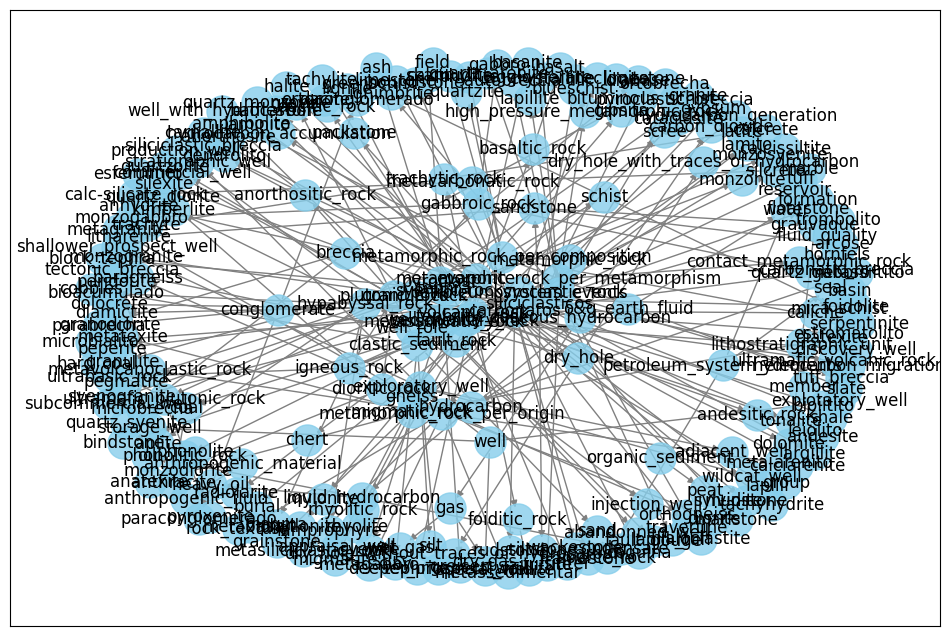

In [19]:
# Criar um grafo dirigido para representar as relações de subclasse
grafo = nx.DiGraph()

# Adicionar classes e relações de subclasse ao grafo
for classe in onto.classes():
    grafo.add_node(classe.iri, label=classe.name)
    for subclasse in classe.subclasses():
        grafo.add_edge(classe.iri, subclasse.iri)

# Desenhar o grafo usando matplotlib
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(grafo)
nx.draw_networkx_nodes(grafo, pos, node_size=500, node_color="skyblue", alpha=0.8)
nx.draw_networkx_labels(grafo, pos, labels=nx.get_node_attributes(grafo, 'label'))
nx.draw_networkx_edges(grafo, pos, edge_color="gray", arrows=True)

# Exibir o grafo interativo
plt.show()

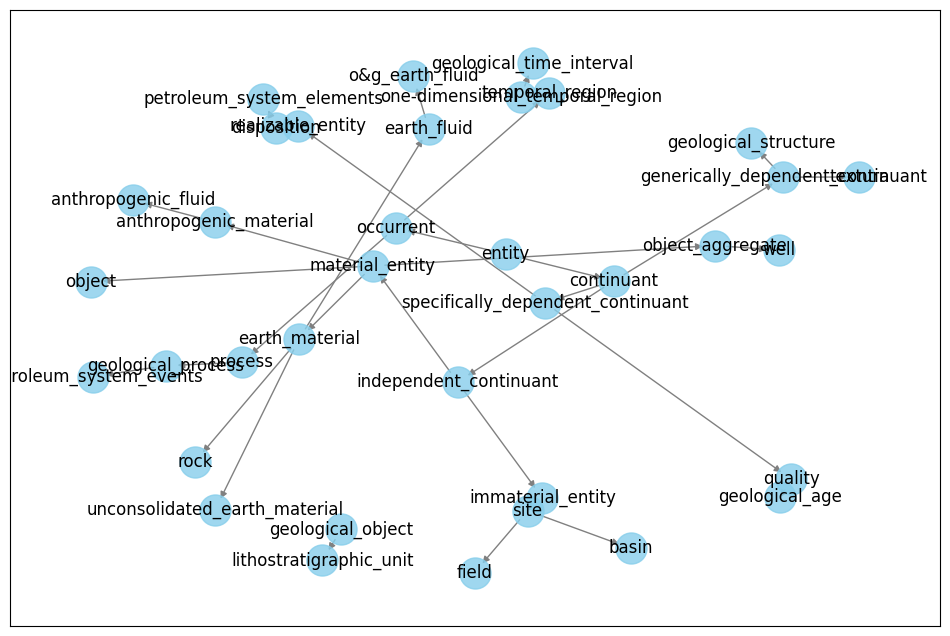

In [21]:
# Criar um grafo dirigido para representar as relações de subclasse
grafo2 = nx.DiGraph()

# Adicionar classes e relações de subclasse ao grafo
for classe in onto2.classes():
    grafo2.add_node(classe.iri, label=classe.name)
    for subclasse in classe.subclasses():
        grafo2.add_edge(classe.iri, subclasse.iri)

# Desenhar o grafo usando matplotlib
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(grafo2)
nx.draw_networkx_nodes(grafo2, pos, node_size=500, node_color="skyblue", alpha=0.8)
nx.draw_networkx_labels(grafo2, pos, labels=nx.get_node_attributes(grafo2, 'label'))
nx.draw_networkx_edges(grafo2, pos, edge_color="gray", arrows=True)

# Exibir o grafo interativo
plt.show()